/usr/local/lib/python3.12/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


✅ Data Loaded Successfully!

         day    site  new_customer    platform  visits  distinct_sessions  \
0 2013-01-01    Acme           1.0     Android      24                 16   
1 2013-01-01    Acme           1.0  BlackBerry       0                  0   
2 2013-01-01  Sortly           1.0        iPad       0                  0   
3 2013-01-01    Acme           1.0     Windows     922                520   
4 2013-01-01   Botly           1.0     Android      11                 10   

   orders  gross_sales  bounces  add_to_cart  product_page_views  \
0      14       1287.0        4           16                 104   
1       0         13.0        0            0                   1   
2       0         98.0        0            0                   0   
3     527      60753.0      149          610                3914   
4      11       1090.0        0           11                   4   

   search_page_views  
0                192  
1                  0  
2                  0  
3      

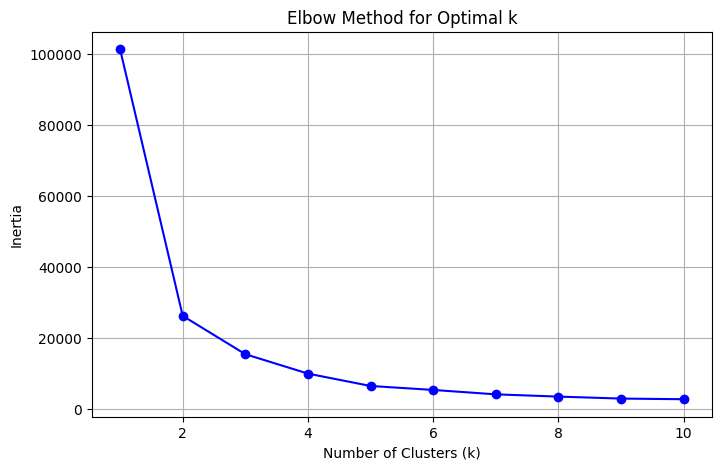


 K-Means Clustering Applied Successfully!
Cluster
2    5432
0    5229
3     397
1     194
Name: count, dtype: int64


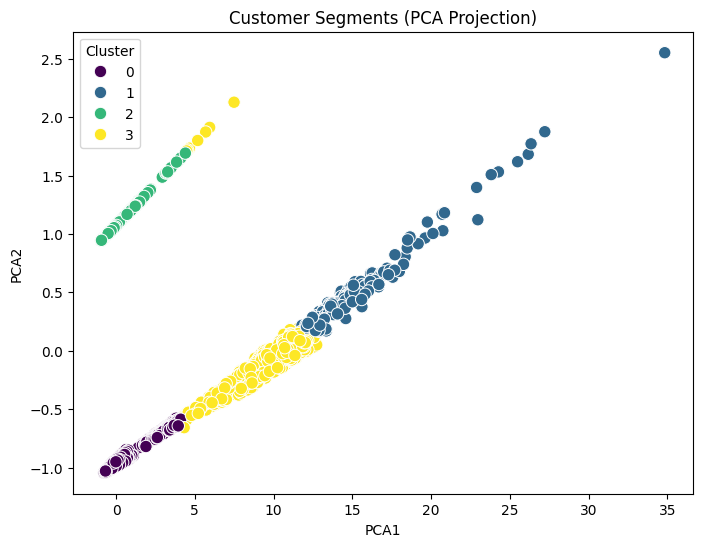


 Cluster Summary (Average Values per Cluster):
         new_customer        visits  distinct_sessions       orders  \
Cluster                                                               
0             0.00000    220.201759         167.498566    44.716963   
1             0.00000  11896.546392        8187.876289  2035.886598   
2             1.00000     76.961156          47.486561    46.419735   
3             0.02267   7124.463476        4764.136020  1087.765743   

           gross_sales      bounces  add_to_cart  product_page_views  \
Cluster                                                                
0          6727.618474    46.926946    71.631287          873.425320   
1        299434.427835  2090.180412  3372.314433        40468.087629   
2          5213.668630    12.102541    52.111561          292.613218   
3        170222.984887  1917.596977  1800.350126        23598.322418   

         search_page_views  Cluster       PCA1      PCA2  
Cluster                          

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

file_path = "/content/Analytics Challenge Data.xlsx"

df = pd.read_excel(file_path)
print("✅ Data Loaded Successfully!\n")
print(df.head())

print("\n Dataset Info:")
print(df.info())

print("\n Summary Statistics:")
print(df.describe())

print("\n Missing Values:")
print(df.isnull().sum())

df = df.dropna()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.select_dtypes(include=np.number))
print("\n Data Scaled Successfully")

inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

print("\n K-Means Clustering Applied Successfully!")
print(df['Cluster'].value_counts())

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=80)
plt.title('Customer Segments (PCA Projection)')
plt.show()

numeric_cols = df.select_dtypes(include=np.number).columns
cluster_summary = df.groupby('Cluster')[numeric_cols].mean()

print("\n Cluster Summary (Average Values per Cluster):")
print(cluster_summary)

print(" - Low engagement users. Retarget with ads or recommendation emails to increase activity.")
print(" - Columns differ in this dataset; review numeric features for marketing insights.")
